## Installation of the dependencies
Here explain all the things needed to do

## Importing the dependencies

In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import uuid
import os
import time

print("Everything imported successfully")

Everything imported successfully


## Loading Pre-trained YOLO model

In [4]:
# Loading the model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

# Loading the sample image provided by Ultralytics
img = "https://ultralytics.com/images/zidane.jpg"

Using cache found in C:\Users\ys723/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-7-25 Python-3.10.0 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
# Making detections on the sample image
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 534.7ms pre-process, 104.5ms inference, 14.4ms NMS per image at shape (1, 3, 384, 640)


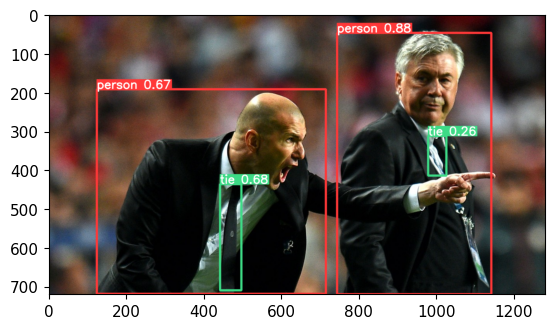

In [11]:
# Visualizing the results
plt.imshow(np.squeeze(results.render()))
plt.show()

## Visualizing object detections made by Pre-trained YOLO model

In [14]:
# Instantiating a video Capture object (0)
cap = cv2.VideoCapture(0)
while cap.isOpened():

    # Read frames 
    ret,frame = cap.read()
    if ret:
        detections = model(frame) # Taking detections from the model
        cv2.imshow("YOLO",np.squeeze(detections.render()))

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

## Data Collection
Since we are trying to solve a niche problem so we need to collect our own data. So I will be collecint images of my own using mobile camera as my primary camera. Our dataset will be having around 4 different classes and these classes will be

1. cloth_face
2. mask_face
3. rumaal_face (Hankerchief)
4. nude_face

*Note* The name of 3rd label will be Rumaal face only and just for your understanding of what is rumaal I have written hankerchief in brackets.Also we will have to run our loop for times because I have to put different different things on my face to cover my face like cloth, mask and rumaal.

In [2]:
Img_Storage_path = "data/images"
Label_Storage_path = "data/labels"

# Instantiating a VideoCapture object
cap = cv2.VideoCapture(0)
    
# Loop through image range
for img_num in range(50):
    print(f'Current class label (cloth_face), Image Number {img_num}')
        
    # Reading frames from the webcam
    ret, frame = cap.read()
    if ret:
        
        # Naming image file
        img_name = os.path.join(Img_Storage_path, f"cloth_face_{img_num}.jpg")
            
        # Writes out image to file 
        cv2.imwrite(img_name, frame)
            
        # Render to the screen
        cv2.imshow('Image Collection', frame)
            
        # 2 second delay between captures
        time.sleep(2)
            
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()

Current class label (cloth_face), Image Number 0
Current class label (cloth_face), Image Number 1
Current class label (cloth_face), Image Number 2
Current class label (cloth_face), Image Number 3
Current class label (cloth_face), Image Number 4
Current class label (cloth_face), Image Number 5
Current class label (cloth_face), Image Number 6


The above print statements are not complete as we are running our loop for capturing 50 images and the above 7 print statements are just for your understandnig about how the things will look when we will collect images for each of the label.